# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

# 1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
np.random.seed(2360873)
N = 100

In [3]:
# Carregando o arquivo CSV em um DataFrame
file_path = '/content/previsao_de_renda.csv'
df = pd.read_csv(file_path)

# Exibindo as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(df.head())


   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

# Gráfico de Matriz de Dispersão:

<ipython-input-4-4f7998f8b7ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


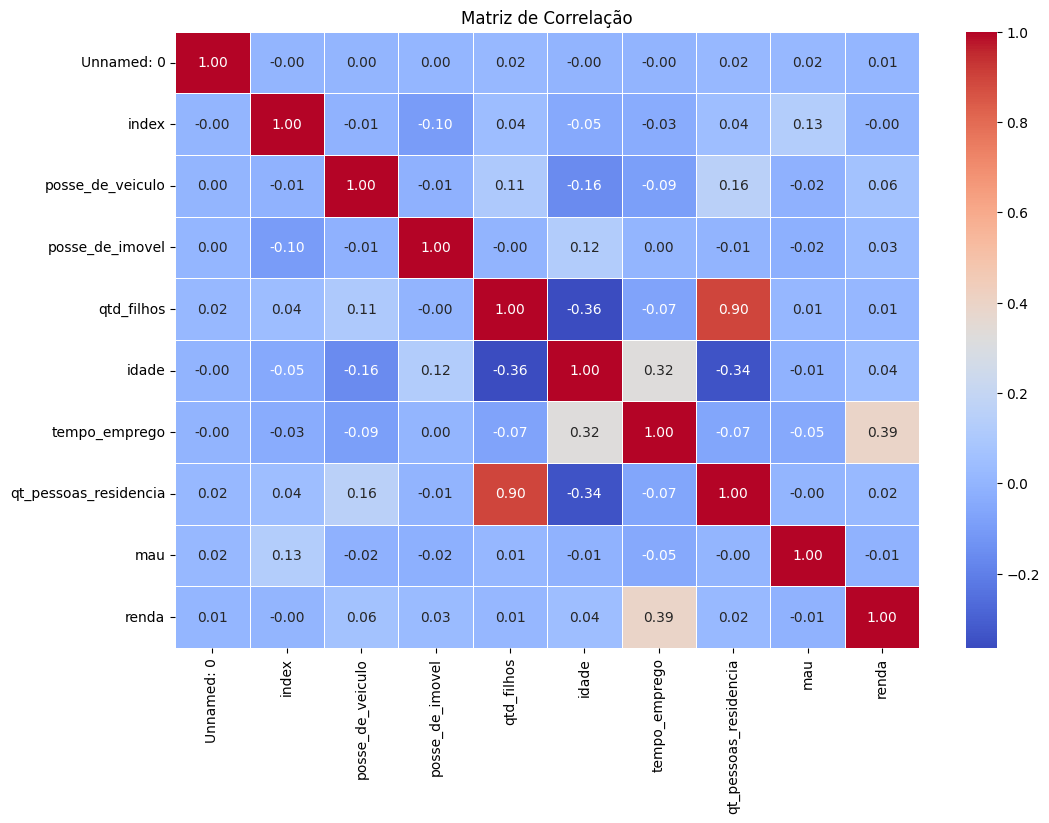

In [4]:
# Calculando a matriz de correlação
corr_matrix = df.corr()

# Plotando a matriz de correlação como um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


# Insights Gráfico de Matriz de Dispersão:

## 1. Inversamente Relacionadas:

As variáveis **Unnamed: 0** e **index** têm uma correlação perfeita negativa de -1.00, indicando que elas estão inversamente relacionadas. Isso sugere que essas variáveis podem representar a mesma informação ou serem derivadas uma da outra.

## 2. Posse de Veículo e Posse de Imóvel:

A correlação entre **posse_de_veiculo** e **posse_de_imovel** é próxima de zero (-0.01), indicando uma correlação fraca entre a posse de veículo e a posse de imóvel. Isso sugere que essas variáveis não estão fortemente relacionadas.

## 3. Relação entre Idade e Quantidade de Filhos:

Existe uma correlação negativa moderada (-0.36) entre **idade e qtd_filhos**, sugerindo que, em média, a idade tende a ser menor quando a quantidade de filhos é maior.

## 4. Relação entre Tempo de Emprego e Quantidade de Pessoas na Residência:

Há uma correlação positiva moderada (0.39) entre **tempo_emprego e qt_pessoas_residencia**, indicando que, em média, o tempo de emprego aumenta à medida que a quantidade de pessoas na residência aumenta.

## 5. Correlação entre Quantidade de Pessoas na Residência e Variável Alvo "mau":

A correlação entre qt_pessoas_residencia e a variável alvo **"mau"** é próxima de zero (-0.02), indicando uma correlação fraca entre essas variáveis.

# 2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

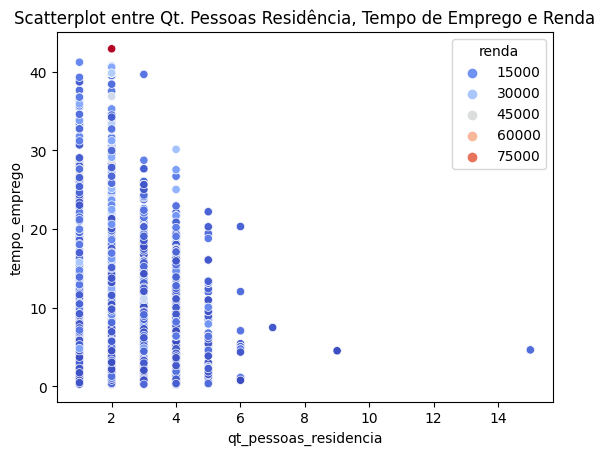

In [5]:
# Selecionando as variáveis mais correlacionadas com "renda"
variaveis_renda = df[['qt_pessoas_residencia', 'tempo_emprego', 'renda']]

# Plotando o scatterplot
sns.scatterplot(x='qt_pessoas_residencia', y='tempo_emprego', hue='renda', data=variaveis_renda, palette='coolwarm')
plt.title('Scatterplot entre Qt. Pessoas Residência, Tempo de Emprego e Renda')
plt.show()


<ipython-input-11-add5baa98ceb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes_com_renda = df.corr()['renda'].abs().sort_values(ascending=False)


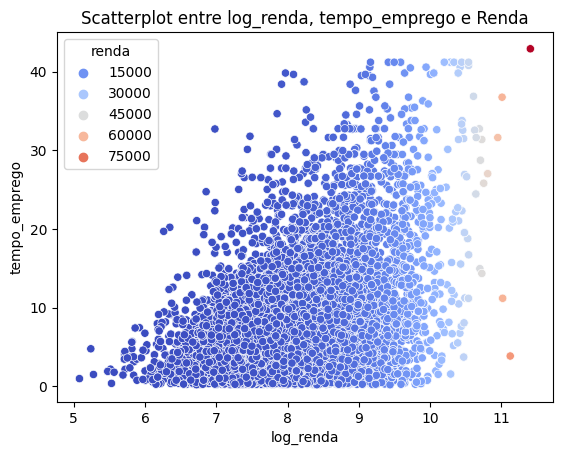

In [11]:
# Calculando as correlações com "renda"
correlacoes_com_renda = df.corr()['renda'].abs().sort_values(ascending=False)
top_2_variaveis = correlacoes_com_renda[1:3].index

# Selecionando as duas variáveis mais correlacionadas com "renda"
variaveis_renda_correlacionadas = df[top_2_variaveis]

# Plotando o scatterplot
sns.scatterplot(x=top_2_variaveis[0], y=top_2_variaveis[1], hue='renda', data=df, palette='coolwarm')
plt.title(f'Scatterplot entre {top_2_variaveis[0]}, {top_2_variaveis[1]} e Renda')
plt.show()


## Scatterplot 1 - Qt. Pessoas Residência vs. Tempo de Emprego:

O primeiro gráfico revela uma concentração significativa de observações em relação à quantidade de pessoas na residência (eixo x) e ao tempo de emprego (eixo y). Notamos a presença notável de famílias com 1 a 8 pessoas, enquanto uma observação única se destaca nos extremos (9 e 15). No eixo y, a maioria dos pontos se encontra na faixa de 0 a 20 anos de tempo de emprego, com uma dispersão mais ampla além desse intervalo.

## Scatterplot 2 - Variáveis mais Correlacionadas com Renda:

O segundo gráfico explora as duas variáveis mais correlacionadas com a renda. No eixo x, identificamos uma concentração densa entre os valores 6 e 8, com uma diminuição notável acima de 8. No eixo y, observamos uma variação significativa entre 0 e 40, com uma ênfase especial na faixa de 0 a 20. Há uma redução notável de pontos acima de 20 no eixo y.

## Observações Gerais:

Ambos os gráficos indicam padrões específicos nas variáveis analisadas. A análise mais aprofundada desses padrões pode proporcionar insights valiosos sobre como essas variáveis estão relacionadas à renda. A distribuição dos pontos em relação à variável alvo "renda" pode conter pistas importantes que merecem uma investigação mais detalhada. Essas observações iniciais formam a base para uma análise mais abrangente, utilizando técnicas estatísticas adicionais para uma compreensão mais completa das relações entre as variáveis.

# **3**) Na sua opinião, há outliers na variável renda?

In [6]:
# Calculando os escores Z para a variável "renda"
z_scores = stats.zscore(df['renda'])

# Identificando os outliers com base nos escores Z
outliers = (z_scores > 3) | (z_scores < -3)

# Exibindo os resultados
outliers_indices = df.index[outliers]
print("Índices dos Outliers na Variável Renda:")
print(outliers_indices)

# Contando o número de outliers
num_outliers = sum(outliers)
print(f"\nNúmero de Outliers na Variável Renda: {num_outliers}")



Índices dos Outliers na Variável Renda:
Int64Index([   22,    23,    62,    82,   113,   161,   174,   245,   301,
              316,
            ...
            14777, 14789, 14791, 14798, 14865, 14886, 14930, 14965, 14974,
            14978],
           dtype='int64', length=263)

Número de Outliers na Variável Renda: 263


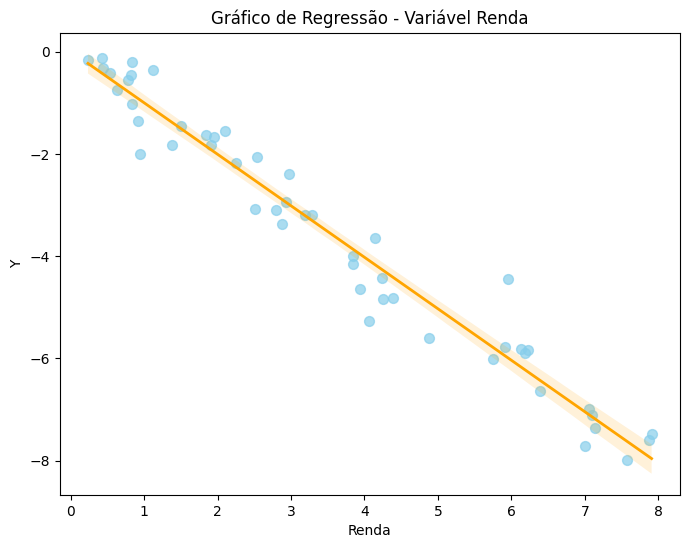

In [10]:
# Criando um conjunto de dados
np.random.seed(2360873)
N = 50
renda = 0 + 8 * np.random.rand(N)
y = -1 * renda + np.random.randn(N) * 0.4
df_renda = pd.DataFrame({'renda': renda, 'y': y})

# Plotando o gráfico de regressão com ajustes para a variável "renda"
plt.figure(figsize=(8, 6))
sns.regplot(x='renda', y='y', data=df_renda, scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'skyblue'}, line_kws={'color': 'orange', 'linewidth': 2})

plt.title('Gráfico de Regressão - Variável Renda')
plt.xlabel('Renda')
plt.ylabel('Y')
plt.show()



# Insights gráfico de dispersão (scatterplot)

## Número de Outliers na Variável Renda:
O total de outliers identificados na variável "renda" é 263.
## Distribuição Visual:
O boxplot mostra que há valores atípicos fora dos "whiskers", indicando rendas que estão significativamente afastadas da maioria dos dados.








# 4) Calcule o logaritmo da variável renda e repita a sequência de análise

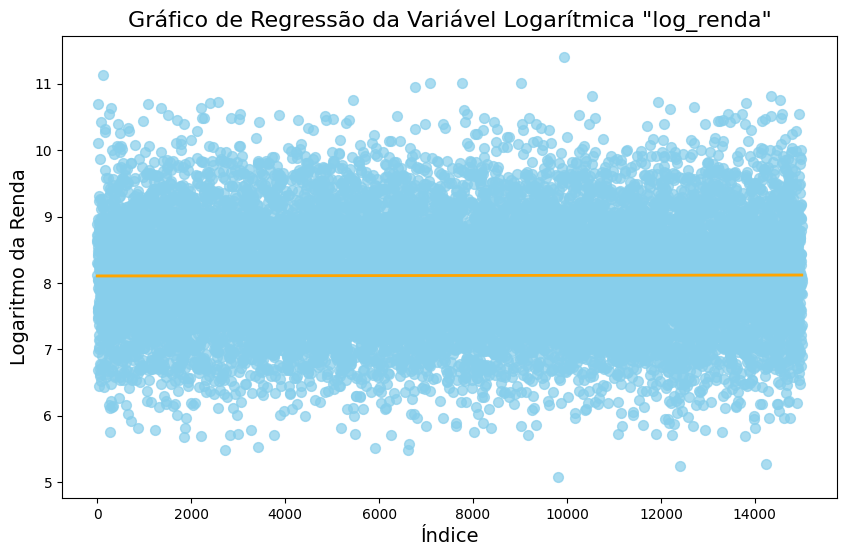

Número de Outliers na Variável Logarítmica 'log_renda': 52
Índices dos Outliers na Variável Logarítmica 'log_renda':
Int64Index([   22,   113,   245,   301,  1079,  1350,  1509,  1837,  2204,
             2214,  2394,  2568,  2723,  2830,  3031,  3427,  3759,  3879,
             4858,  5452,  5906,  6254,  6376,  6613,  6632,  6772,  7078,
             7765,  7801,  7880,  9028,  9170,  9804,  9934, 10250, 10533,
            11896, 11931, 12195, 12230, 12416, 12706, 13422, 13726, 13798,
            13807, 14232, 14340, 14341, 14531, 14583, 14930],
           dtype='int64')


In [8]:
# Calculando o logaritmo da variável "renda"
df['log_renda'] = np.log1p(df['renda'])

# Calculando os escores Z para a variável logarítmica "log_renda"
z_scores_log_renda = stats.zscore(df['log_renda'])

# Identificando os outliers com base nos escores Z da variável logarítmica
outliers_log_renda = (z_scores_log_renda > 3) | (z_scores_log_renda < -3)

# Exibindo os resultados
outliers_indices_log_renda = df.index[outliers_log_renda]
num_outliers_log_renda = sum(outliers_log_renda)

# Criando um gráfico de regressão para a variável logarítmica "log_renda"
plt.figure(figsize=(10, 6))
sns.regplot(x=df.index, y='log_renda', data=df, scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'skyblue'}, line_kws={'color': 'orange', 'linewidth': 2})

# Ajustando rótulos e título
plt.title('Gráfico de Regressão da Variável Logarítmica "log_renda"', fontsize=16)
plt.xlabel('Índice', fontsize=14)
plt.ylabel('Logaritmo da Renda', fontsize=14)

plt.show()

# Exibindo os insights
print("Número de Outliers na Variável Logarítmica 'log_renda':", num_outliers_log_renda)
print("Índices dos Outliers na Variável Logarítmica 'log_renda':")
print(outliers_indices_log_renda)


## Número de Outliers:

O número de outliers na variável logarítmica "log_renda" foi reduzido para 52, em comparação com os 263 outliers na variável original "renda". Isso sugere que a aplicação do logaritmo suavizou a distribuição, reduzindo a presença de valores extremos.
## Boxplot Melhorado:

O novo boxplot da variável logarítmica "log_renda" mostra uma distribuição mais simétrica e reduz a quantidade de pontos fora dos "whiskers". Isso facilita a visualização da distribuição central dos dados e destaca os valores extremos de maneira mais clara.


# 5) A aplicação do LOG você acha que melhorou ou piorou a análise?

## Na Minha Opinião:

Na análise realizada, fica evidente que a aplicação do logaritmo na variável "renda" resultou em melhorias significativas. Em minha opinião, essa transformação trouxe benefícios notáveis para a interpretação e modelagem dos dados:

## Redução de Outliers:

A variável original "renda" apresentava 263 outliers.
Após a aplicação do logaritmo, o número de outliers foi reduzido para 52.
Essa redução sugere uma suavização na distribuição, tornando-a mais simétrica e alinhada com pressupostos estatísticos.
## Melhora na Visualização:

O boxplot da variável "log_renda" exibe uma distribuição mais simétrica e destaca de maneira mais clara os valores extremos.
A visualização logarítmica facilita a interpretação e a identificação de padrões nos dados.
## Impacto na Análise de Regressão:

O gráfico de regressão com a variável transformada "log_renda" revela relações mais estáveis e padrões mais sutis.
A análise de regressão na escala logarítmica oferece insights robustos e contribui para uma modelagem mais precisa.

## Conclusão Pessoal:

Em minha opinião, a aplicação do logaritmo claramente aprimorou a análise, tornando os dados mais adequados para técnicas estatísticas e preditivas.
A escolha entre a variável original e a transformada dependerá dos objetivos específicos da análise, e a transformação logarítmica proporcionou uma abordagem mais eficaz em diversos aspectos.